<a href="https://colab.research.google.com/github/Jordan3448/ComputerVision/blob/main/Machine_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will learn about a **Perceptron** as a example of simple **machine learning** technique.

An individual perceptron has one or more analog inputs and one digital output.

For example, we will use a perceptron to take in the inputs of (height and weight) and output True or False (based on whether the person is on the football team or the equestrain team).

**Supervised Learning** - machine learning when you have labeled data to train on.

**Unsupervised Learning** - you do not have labeled data, but rather count on the machine to automatically generate categories or models of the data.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print('modules loaded')

modules loaded


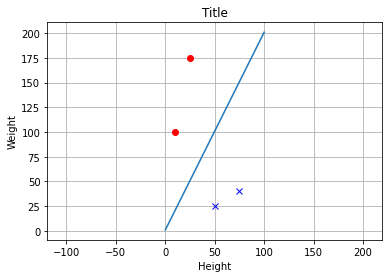

In [2]:
#plot y = 2x + 1
x = np.linspace(0,100,50)
y = 2*x +1

footballX = np.array([25, 10])
footballY = np.array([175, 100])
bX = np.array([50, 75])
bY = np.array([25,40])
# when two or more plots are shown on the same graph its called overlaying
plt.plot(footballX, footballY, 'o', color = 'red')
plt.plot(bX, bY, 'x', color = 'blue')
plt.plot(x,y)
#sets axis equal to each other
plt.axis('equal')
#applies graph paper
plt.grid(True)

plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Title')

plt.show()

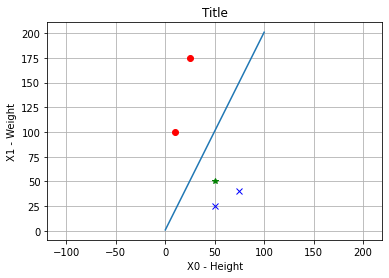

In [3]:
#x --> X0
#y--> X1
#IsX? --> Y

#plot y = 2x + 1
X0 = np.linspace(0,100,50)
X1 = 2*x +1 # y = mx + b

footballX0 = np.array([25, 10])
footballX1 = np.array([175, 100])
bX0 = np.array([50, 75])
bX1 = np.array([25,40])
# when two or more plots are shown on the same graph its called overlaying
plt.plot(footballX0, footballX1, 'o', color = 'red')
plt.plot(bX0, bX1, 'x', color = 'blue')
plt.plot(X0,X1)
plt.plot([50], [50], '*', color = 'green')
#sets axis equal to each other
plt.axis('equal')
#applies graph paper
plt.grid(True)

plt.ylabel('X1 - Weight')
plt.xlabel('X0 - Height')
plt.title('Title')

plt.show()

In [4]:
def perceptron(X0, X1):
  """Given X0 and X1 inputs return True uf ut thinks it is an X otherwise returns False. 
  More specifically the algorithm multiplies the X0s by w0, and multiplies the X1s by w1, adds them all up, 
  then looks at whether the sum is greater than the threshold T."""
  T = 90
  w0 = 1
  w1 = 1
  sum = w0*X0 + w1*X1

  if sum > T:
    print('Skinny')
    return True
  else:
    print('Fat')
    return False

In [5]:
#This should be True/Skinny
testX0 = 50
testX1 = 50
perceptron(testX0, testX1)

Skinny


True

In [6]:
#This should be False/Fat
testX0 = 1
testX1 = 75
perceptron(testX0, testX1)

Fat


False

Bonus: Plot on the graph above the line that defines the interface of when our perception switches from False to True.

w0x +w1y - Thresh = 0

y = (thresh/w1) - (w0/w1)x

In [7]:
from keras.datasets import mnist
#mnist dataset --> handwritten digits
print("nmist loaded")

nmist loaded


In [16]:
#help(mnist)
# x is the only inputs in this case.
# y is the output in this case.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
type(x_train)

numpy.ndarray

In [18]:
print('shape:', x_train.shape)

shape: (60000, 28, 28)


label: 5


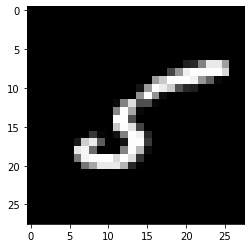

In [24]:
x_train[0,:,:]
plt.imshow(x_train[11,:,:], cmap=plt.get_cmap('gray'))
print('label:', y_train[11])

In [12]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
indices_for_8 = y_train == 8
x8_train = x_train[indices_for_8,:,:]
#x8_train = x_train[y_train==8,:,:] is a faster way to separate the variable.
indices_for_1 = y_train == 1
x1_train = x_train[indices_for_1,:,:]

In [14]:
print(x8_train[0,:,:].sum())
print(x1_train[0,:,:].sum())

27106
17135


In [27]:
print('label:', y_train[0])
sum_pixel = x_train[0,:,:].sum()
print('sum pixel value', sum_pixel)
print('label:', y_train[5])
sum_pixel = x_train[5,:,:].sum()
print('sum pixel value', sum_pixel)

label: 5
sum pixel value 27525
label: 2
sum pixel value 29601


In [31]:
for i in range(10):
  print('label:', y_train[i])
  sum_pixel = x_train[i,:,:].sum()
  print('sum pixel value', sum_pixel)

label: 5
sum pixel value 27525
label: 0
sum pixel value 31095
label: 4
sum pixel value 19443
label: 1
sum pixel value 17135
label: 9
sum pixel value 23214
label: 2
sum pixel value 29601
label: 1
sum pixel value 17646
label: 3
sum pixel value 35867
label: 1
sum pixel value 10874
label: 4
sum pixel value 21904


In [38]:
x1_sum = x1_train.sum(axis=1).sum(axis=1)
print(x1_sum.shape)
x8_sum = x8_train.sum(axis=1).sum(axis=1)
print(x8_sum.shape)

(6742,)
(5851,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1ac503690>]],
      dtype=object)

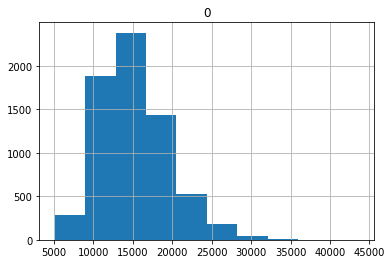

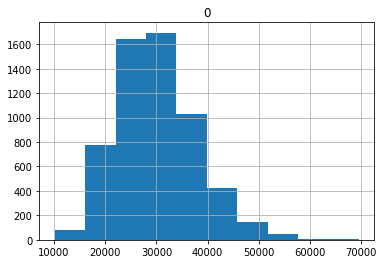

In [45]:
import pandas as pd
df = pd.DataFrame(x1_sum)
df.hist()
df = pd.DataFrame(x8_sum)
df.hist()